# Import Statements

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Loading the data into a Pandas DataFrame

In [ ]:
df = pd.read_csv("train.csv")
df.sample(5)

,Index,LengthOfURL,LengthOfDomain,ObfuscationRate,CharacterProbabilityInURL,LengthOfTLD,ContainsObfuscation,CharacterContinuityRate,CountOfSubdomains,LetterCountInURL,IsDomainAnIP,NumberOfiFrames,CountOfObfuscatedChars,TopLevelDomain,LegitimacyProbabilityOfTLD,Target
31034,31934,37.0,NaN,0.0,NaN,3.0,0.0,NaN,1.0,25.0,NaN,NaN,0.0,com,0.522907,0
15609,41279,22.0,NaN,0.0,NaN,2.0,NaN,1.0,1.0,NaN,0.0,NaN,0.0,NaN,0.000071,0
42790,15080,30.0,23.0,0.0,0.070323,3.0,0.0,1.0,1.0,17.0,0.0,NaN,0.0,com,0.522907,1
2971,12889,27.0,20.0,0.0,NaN,NaN,0.0,1.0,1.0,14.0,0.0,0.0,0.0,com,0.522907,1
39060,19997,41.0,35.0,NaN,0.060396,3.0,0.0,NaN,3.0,23.0,NaN,0.0,0.0,com,0.522907,0


# Preliminary EDA and pre-processing

In [3]:
df.shape

(50215, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50215 entries, 0 to 50214
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Index                       50215 non-null  int64  
 1   LengthOfURL                 38328 non-null  float64
 2   LengthOfDomain              39615 non-null  float64
 3   ObfuscationRate             39820 non-null  float64
 4   CharacterProbabilityInURL   38158 non-null  float64
 5   LengthOfTLD                 38166 non-null  float64
 6   ContainsObfuscation         38600 non-null  float64
 7   CharacterContinuityRate     38337 non-null  float64
 8   CountOfSubdomains           39254 non-null  float64
 9   LetterCountInURL            39352 non-null  float64
 10  IsDomainAnIP                38402 non-null  float64
 11  NumberOfiFrames             37989 non-null  float64
 12  CountOfObfuscatedChars      39537 non-null  float64
 13  TopLevelDomain              390

## Label Encoding

In [5]:
le = LabelEncoder()
df['TopLevelDomain'] = le.fit_transform(df['TopLevelDomain'])
df['TopLevelDomain']

0        356
1        323
2        130
3        115
4        115
        ... 
50210    419
50211    208
50212    115
50213    419
50214    115
Name: TopLevelDomain, Length: 50215, dtype: int64

## Taking a look at the missing values

<Axes: >

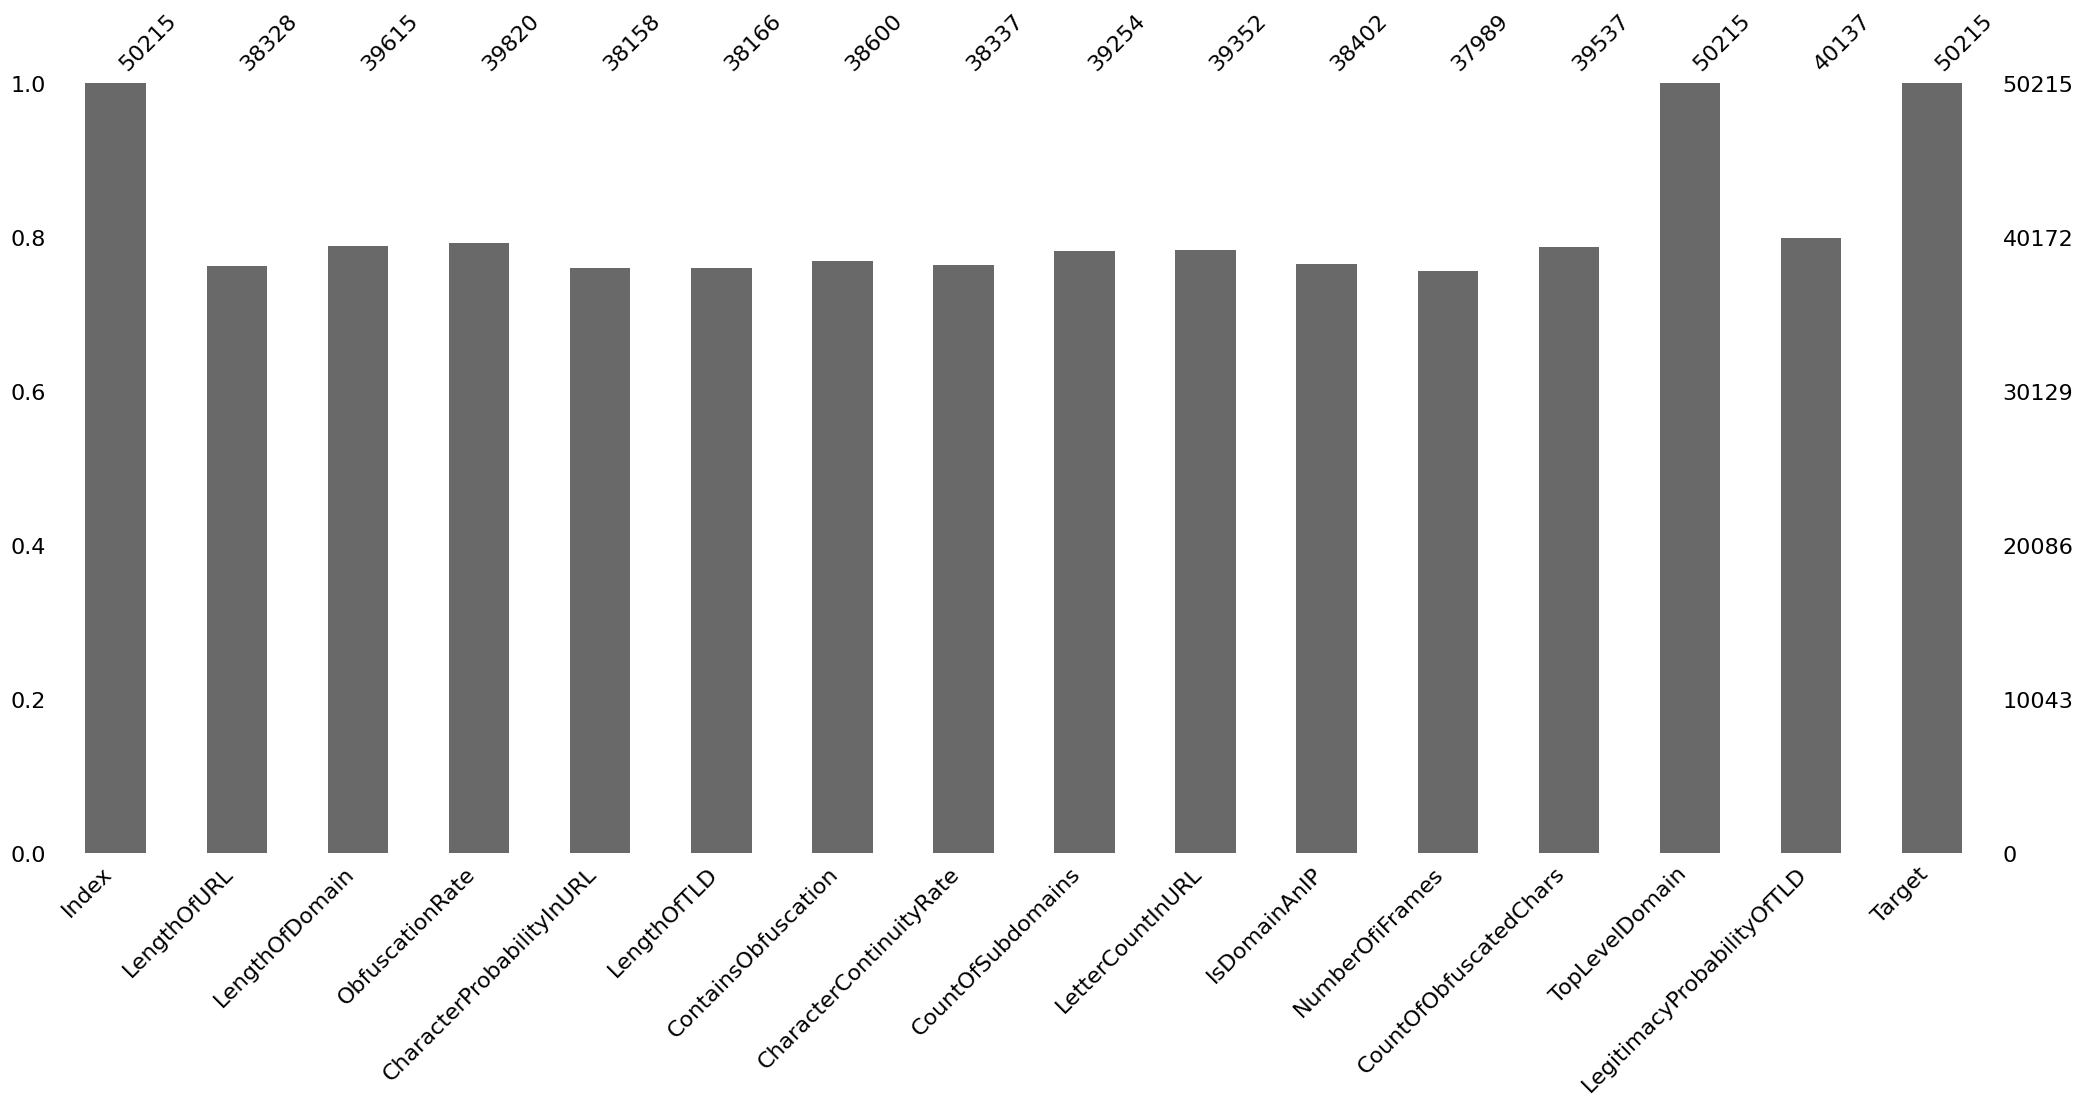

In [6]:
msno.bar(df)

## Imputation (using mean)

In [7]:
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

<Axes: >

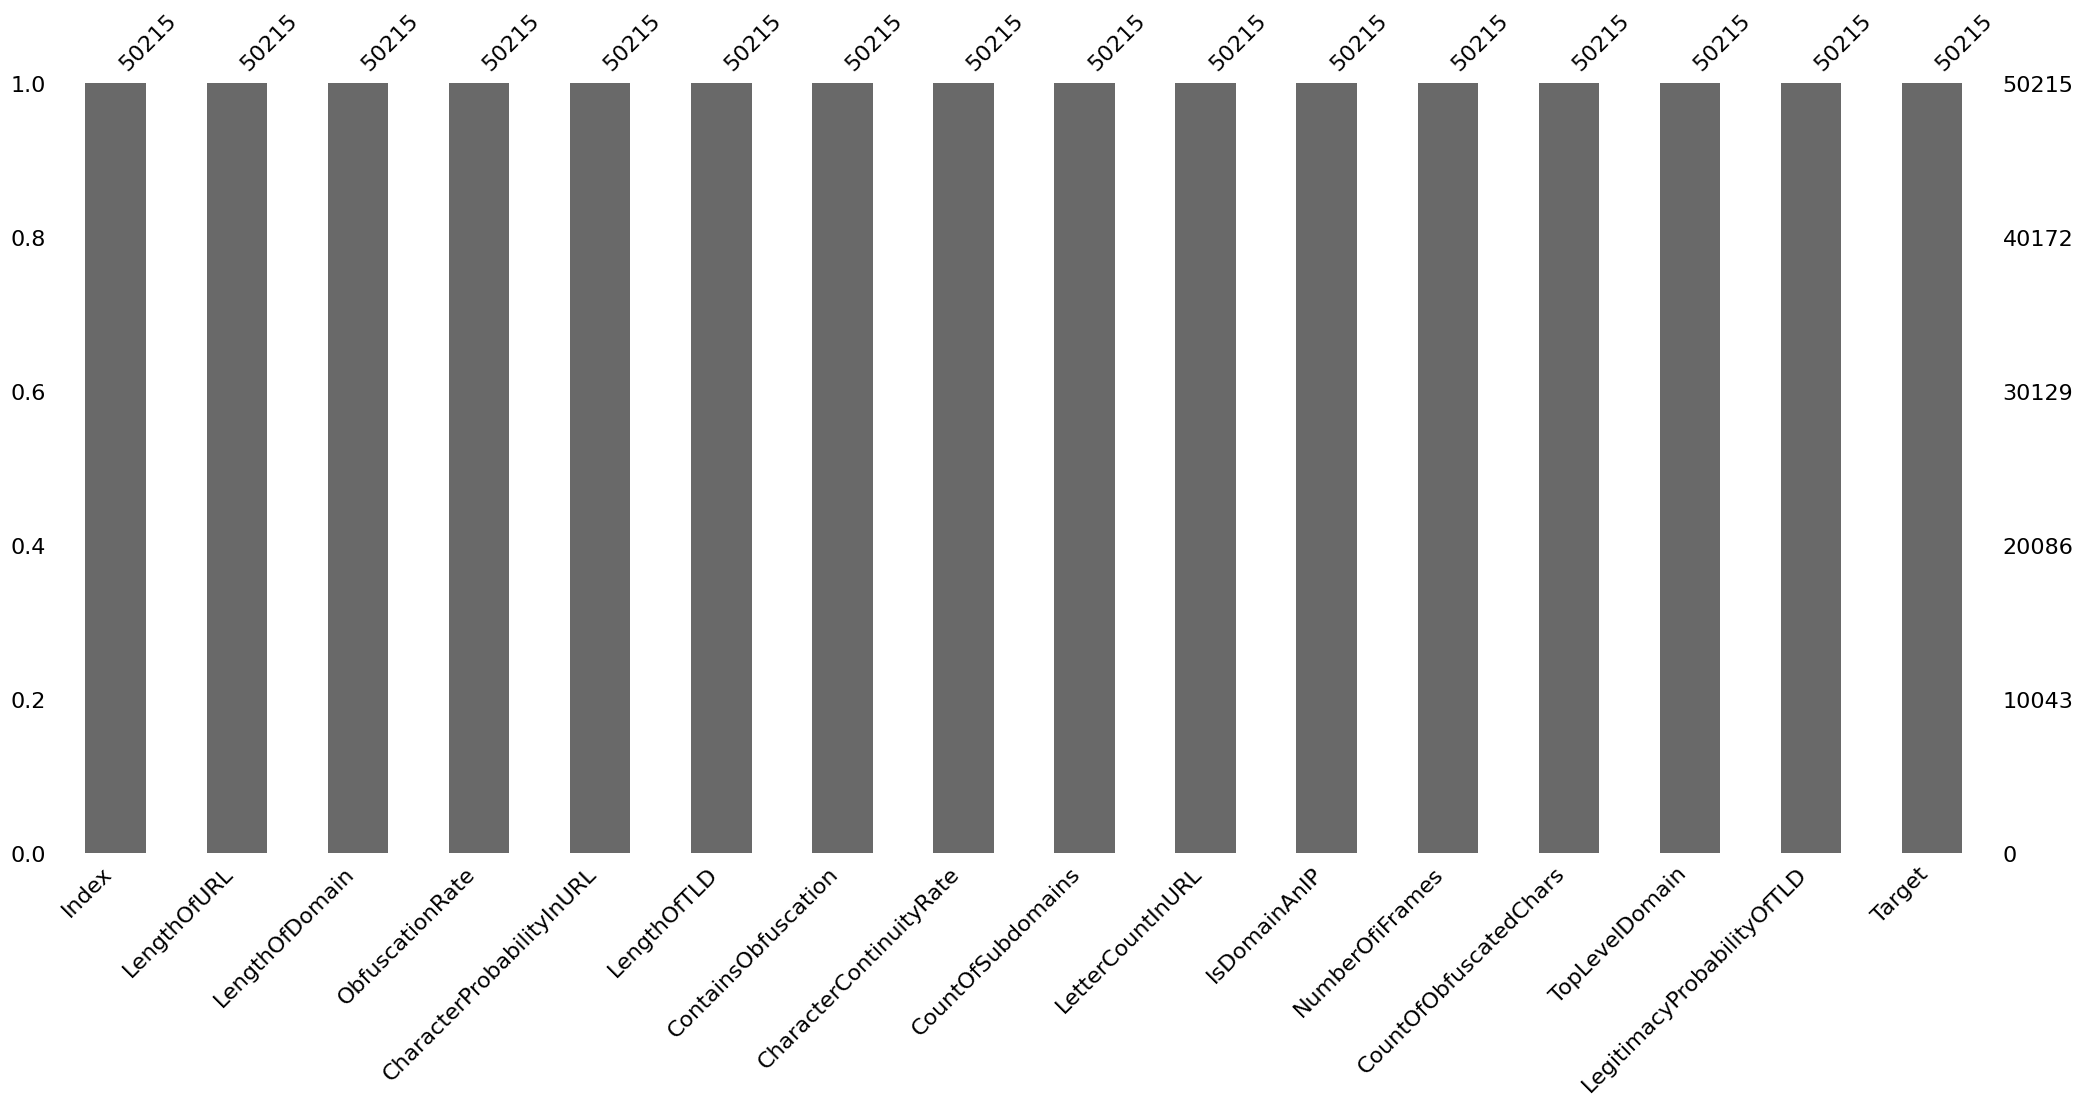

In [8]:
msno.bar(df)

# Model Development

In [9]:
y = df['Target']
X = df.drop(["Index", "Target"], axis=1)

## Train test split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40172, 14), (10043, 14), (40172,), (10043,))

## RandomForest Classifier Implementation
### I know this is not the model we showed you in the session. But I wanted you guys to implement those on your own. This model is significantly more powerful than the ones we showed you. Some avenues for further tinkering might be:

1. ### try other models. do your research on which ones might be well suited.
2. ### try ensemble methods like voting classifier.
3. ### maybe try some other encoding strategies.
4. ### play around with the train test split sizes.
5. ### go for a different imputation strategy perhaps.

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    learning_rate=0.07,  # Lower learning rate
    n_estimators=2000,   # Increased number of estimators
    max_depth=7,         # You can experiment with this value, e.g., 6-10
    subsample=0.9,       # Increased subsample to encourage diversity
    colsample_bytree=0.9,  # Leave it as it is for good performance
    gamma=0.4,           # Regularization to prevent overfitting
    alpha=0.5,           # L1 regularization
    scale_pos_weight=2,  # Use this if there's class imbalance
    eval_metric='logloss',  # Logloss is often good for classification tasks
    use_label_encoder=False  # Disable deprecated label encoder
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb:.4f}')

Random Forest Accuracy: 0.9007


# Submission

In [ ]:
test_df = pd.read_csv("test.csv")

# We will need the indices in the submission CSV
index = test_df["Index"]
X_contest = test_df.drop("Index", axis=1)

# Label Encoding again
le = LabelEncoder()
X_contest['TopLevelDomain'] = le.fit_transform(X_contest['TopLevelDomain'])

# Imputing here as well
X_contest = pd.DataFrame(imputer.fit_transform(X_contest), columns=X_contest.columns)

# Getting predictions
y_submission = xgb.predict(X_contest)

# Making the submission CSV file following the format given
submission = pd.DataFrame({"Index": index, "Target": y_submission})
submission.sample(5)

,Index,Target
2208,39591,1.0
3919,29995,0.0
5143,10947,1.0
4742,45103,0.0
828,47299,1.0


In [15]:
# Saving your CSV file
submission.to_csv("/kaggle/working/submission.csv", index=False)